In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [100]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [101]:
encoder = LabelEncoder()
for col in ('BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'):
    df[col] = encoder.fit_transform(df[col])

In [83]:
attrition = df['Attrition']
df_modified = df.drop("Attrition", axis=1)
df_modified = df_modified.drop("EmployeeNumber", axis=1)
df_modified = df_modified.drop("EmployeeCount", axis=1)
df_modified.insert(31, "Attrition", attrition , True) 
df_modified.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Attrition
0,41,2,1102,2,1,2,1,2,0,94,...,0,8,0,1,6,4,0,5,0,1
1,49,1,279,1,8,1,1,3,1,61,...,1,10,3,3,10,7,1,7,1,0
2,37,2,1373,1,2,2,4,4,1,92,...,0,7,3,3,0,0,0,0,2,1
3,33,1,1392,1,3,4,1,4,0,56,...,0,8,3,3,8,7,3,0,3,0
4,27,2,591,1,2,1,3,1,1,40,...,1,6,3,3,2,2,2,2,4,0


In [84]:
all_features = df_modified.iloc[:,0:30].values
attrition_label = df_modified.iloc[:, 31].values
all_features_np = np.array(all_features)

In [85]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features_np)
all_features_scaled

array([[ 4.23845236e-01,  5.90511617e-01,  7.26192848e-01, ...,
        -7.26498346e-02, -6.72389488e-01,  2.38153555e-01],
       [ 1.27132961e+00, -9.23318663e-01, -1.29668704e+00, ...,
         7.54110645e-01, -3.68156920e-01,  7.92676442e-01],
       [ 1.03050142e-04,  5.90511617e-01,  1.39229303e+00, ...,
        -1.17499714e+00, -6.72389488e-01, -1.14815366e+00],
       ...,
       [-1.37705905e+00,  5.90511617e-01,  1.64546026e+00, ...,
        -7.26498346e-02, -6.72389488e-01, -3.16369332e-01],
       [-5.29574682e-01,  5.90511617e-01, -5.05232210e-01, ...,
        -3.48236661e-01, -6.72389488e-01, -3.16369332e-01],
       [-3.17703589e-01,  5.90511617e-01, -9.96819060e-01, ...,
        -7.26498346e-02, -6.72389488e-01, -5.93630776e-01]])

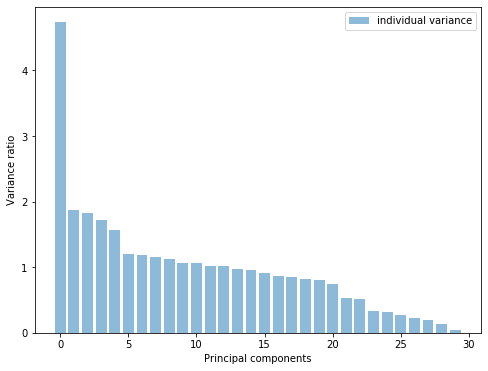

In [86]:
pca = PCA()
pca.fit_transform(all_features_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(30), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [102]:
pca1 = PCA(n_components=29, whiten=True).fit(all_features_scaled) # 24 pe best aaraha hai logistic regression ka cv score
all_features_scaled_pca1 = pca1.transform(all_features_scaled)

print(pca1.explained_variance_ratio_)
print(sum(pca1.explained_variance_ratio_))

[0.15768145 0.06239972 0.06066871 0.05702487 0.05216574 0.04024846
 0.03966163 0.03835067 0.03731002 0.03558855 0.03525895 0.03395858
 0.03374943 0.03262969 0.03199398 0.03018431 0.02872886 0.02813099
 0.02742979 0.02655876 0.02480321 0.01789684 0.01738357 0.01094634
 0.01033915 0.00908296 0.00748059 0.00655513 0.00438949]
0.9986004665981867


In [103]:
#prepaaring test data

df_test = pd.read_csv('test.csv')


In [104]:
encoder = LabelEncoder()
for col in ('BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'):
    df_test[col] = encoder.fit_transform(df_test[col])

In [105]:
df_test = df_test.drop("EmployeeNumber", axis=1)
df_test = df_test.drop("EmployeeCount", axis=1)

In [106]:
test_features = df_test.iloc[:,0:30].values
test_features_scaled = scaler.fit_transform(test_features)
test_features_scaled_pca1 = pca1.transform(test_features_scaled)

In [107]:
# # Logistic Regression
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()
# cv_scores = cross_val_score(clf, all_features_scaled_pca1, attrition_label, cv=10)
# cv_scores.mean()

In [108]:
# clf.fit(all_features_scaled_pca1, attrition_label)

# attrition_pred = clf.predict(test_features_scaled_pca1)

In [109]:
# from numpy import savetxt
# print(type(attrition_pred))

# ID = df_test['ID']
# print(type(ID))

# out = np.column_stack((ID, attrition_pred))
# print(out.dtype)
# out = out.astype('int16')
# print(out.dtype)
# np.savetxt('16D110019Logistic.csv', out, delimiter=',', header='ID,Attrition', comments='')

In [115]:
#SVM
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [116]:
cv_scores = cross_val_score(svc, all_features_scaled_pca1, attrition_label, cv=10)

cv_scores.mean()

0.8598191143522383

In [117]:
svc.fit(all_features_scaled_pca1, attrition_label)

attrition_pred = svc.predict(test_features_scaled_pca1)

In [118]:
print(type(attrition_pred))

ID = df_test['ID']
print(type(ID))

out = np.column_stack((ID, attrition_pred))
print(out.dtype)
out = out.astype('int16')
print(out.dtype)
np.savetxt('16D110019svm.csv', out, delimiter=',', header='ID,Attrition', comments='')

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
int64
int16


In [42]:
# #Naive Bayes
# from sklearn.naive_bayes import MultinomialNB

# scaler = preprocessing.MinMaxScaler()
# all_features_minmax = scaler.fit_transform(all_features)
# test_features_minmax = scaler.fit_transform(test_features)
# naiv = MultinomialNB()
# cv_scores = cross_val_score(naiv, all_features_minmax, attrition, cv=10)

# cv_scores.mean()

0.8326985312422204

In [43]:
# naiv.fit(all_features_minmax, attrition_label)

# attrition_pred = naiv.predict(test_features_minmax)

In [44]:
# print(type(attrition_pred))

# ID = df_test['ID']
# print(type(ID))

# out = np.column_stack((ID, attrition_pred))
# print(out.dtype)
# out = out.astype('int16')
# print(out.dtype)
# np.savetxt('16D110019naive.csv', out, delimiter=',', header='ID,Attrition', comments='')

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
int64
int16


In [45]:
# #K nearest Neighbours
# from sklearn import neighbors

# knn = neighbors.KNeighborsClassifier(n_neighbors=10)
# cv_scores = cross_val_score(clf, all_features_scaled_pca1, attrition_label, cv=10)

# cv_scores.mean()

0.8569251636427536

In [46]:
# for n in range(1, 50):
#     knn = neighbors.KNeighborsClassifier(n_neighbors=n)
#     cv_scores = cross_val_score(knn, all_features_scaled_pca1, attrition_label, cv=10)
#     print (n, cv_scores.mean())

1 0.774347991623834
2 0.8326890128717656
3 0.8171543001068986
4 0.8395140505791561
5 0.8307756373647293
6 0.8414180907613231
7 0.8375157419203678
8 0.8355924819517051
9 0.8336507343788897
10 0.8356206709718987
11 0.8298047635783214
12 0.8326983481966348
13 0.835639524667223
14 0.8307470822533644
15 0.8317274744102271
16 0.8317274744102271
17 0.8307470822533644
18 0.8336694050286283
19 0.834640278815036
20 0.8336694050286283
21 0.8336694050286283
22 0.8326985312422204
23 0.8326985312422204
24 0.8326985312422204
25 0.8336789233990831
26 0.8326985312422204
27 0.8336694050286283
28 0.8336694050286283
29 0.8336694050286283
30 0.8336694050286283
31 0.8336694050286283
32 0.8336694050286283
33 0.8336694050286283
34 0.8326985312422204
35 0.8336694050286283
36 0.8336694050286283
37 0.8336694050286283
38 0.8326985312422204
39 0.8336694050286283
40 0.8326985312422204
41 0.8336694050286283
42 0.8326985312422204
43 0.8336694050286283
44 0.8326985312422204
45 0.8326985312422204
46 0.8326985312422204


In [47]:
# knn.fit(all_features_scaled_pca1, attrition_label)

# attrition_pred = knn.predict(test_features_scaled_pca1)
# print(type(attrition_pred))

# ID = df_test['ID']
# print(type(ID))

# out = np.column_stack((ID, attrition_pred))
# print(out.dtype)
# out = out.astype('int16')
# print(out.dtype)
# np.savetxt('16D110019knn.csv', out, delimiter=',', header='ID,Attrition', comments='')

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
int64
int16
